In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing necessary libraries for data analysis, visualization, and modeling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/Datsets/Obesity prediction.csv')
data

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,NaN,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,NaN,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,NaN,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,NaN,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,NaN,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,NaN,no,1.341390,0.599270,NaN,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,NaN,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,NaN,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
# Preview the dataset
print("Dataset Preview:")
print(data.head())

# Display dataset information
print("\nDataset Information:")
print(data.info())

# Display basic statistics of the dataset
print("\nDataset Statistics:")
print(data.describe())

Dataset Preview:
   Gender   Age  Height  Weight family_history FAVC  FCVC  NCP       CAEC  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.0  Sometimes   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.0  Sometimes   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.0        NaN   
3    Male  27.0    1.80    87.0             no   no   3.0  NaN  Sometimes   
4    Male  22.0    1.78    89.8            NaN   no   2.0  1.0  Sometimes   

  SMOKE  CH2O  SCC  FAF  TUE        CALC                 MTRANS  \
0    no   NaN   no  0.0  1.0          no  Public_Transportation   
1   yes   3.0  yes  NaN  0.0   Sometimes  Public_Transportation   
2    no   2.0   no  2.0  1.0  Frequently  Public_Transportation   
3    no   2.0   no  2.0  0.0  Frequently                Walking   
4    no   2.0   no  0.0  0.0   Sometimes  Public_Transportation   

               Obesity  
0        Normal_Weight  
1        Normal_Weight  
2        Normal_Weight  
3   Overweight_Le

In [ ]:
# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Fill or drop missing values (example: using mean for numerical columns)
for column in data.select_dtypes(include=np.number).columns:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mean(), inplace=True)

# Fill or drop missing categorical values (example: using mode)
for column in data.select_dtypes(include=['object']).columns:
    if data[column].isnull().sum() > 0:
        data[column].fillna(data[column].mode()[0], inplace=True)

print("\nMissing Values After Handling:")
print(data.isnull().sum())
print(data.shape)



Missing Values:
Gender            104
Age               112
Height            107
Weight            102
family_history    101
FAVC               86
FCVC              101
NCP               128
CAEC               92
SMOKE             111
CH2O              102
SCC                93
FAF                94
TUE                98
CALC              105
MTRANS            107
Obesity           112
dtype: int64

Missing Values After Handling:
Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64
(2111, 17)


<ipython-input-73-b19a7fb6709f>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)
<ipython-input-73-b19a7fb6709f>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:

# Drop rows with NaN values
data = data.dropna().copy()  # Again, ensure a copy is made

# Remove duplicates if any
data.drop_duplicates(inplace=True)

# Standardize column names (optional but helpful for consistency)
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')

print("\nData after basic cleaning:")
print(data.head())
print(data.shape)


Data after basic cleaning:
   gender   age  height  weight family_history favc  fcvc       ncp  \
0  Female  21.0    1.62    64.0            yes   no   2.0  3.000000   
1  Female  21.0    1.52    56.0            yes   no   3.0  3.000000   
2    Male  23.0    1.80    77.0            yes   no   2.0  3.000000   
3    Male  27.0    1.80    87.0             no   no   3.0  2.685604   
4    Male  22.0    1.78    89.8            yes   no   2.0  1.000000   

        caec smoke      ch2o  scc       faf  tue        calc  \
0  Sometimes    no  2.001339   no  0.000000  1.0          no   
1  Sometimes   yes  3.000000  yes  1.001221  0.0   Sometimes   
2  Sometimes    no  2.000000   no  2.000000  1.0  Frequently   
3  Sometimes    no  2.000000   no  2.000000  0.0  Frequently   
4  Sometimes    no  2.000000   no  0.000000  0.0   Sometimes   

                  mtrans              obesity  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transp

In [ ]:
# Strip column names to remove any leading/trailing spaces
data.columns = data.columns.str.strip()

# Binary Encoding (Yes/No Columns)
binary_cols = ['family_history', 'favc', 'smoke', 'scc']
for col in binary_cols:
    data[col] = data[col].astype(str).str.strip().str.lower()  # Convert to string first
    data[col] = data[col].map({'yes': 1, 'no': 0})
    data[col] = pd.to_numeric(data[col], errors='coerce').fillna(0).astype(int)  # Ensure numeric

# Binary Encoding for Gender
data['gender'] = data['gender'].astype(str).str.strip().str.lower().map({'male': 1, 'female': 0})
data['gender'] = data['gender'].fillna(0).astype(int)  # Default to Female (0)

# Binning Categorical Columns
# Binning CAEC (Eating between meals)
caec_mapping = {'never': 0, 'sometimes': 1, 'frequently': 2, 'always': 3}
data['caec'] = data['caec'].astype(str).str.strip().str.lower().map(caec_mapping)
data['caec'] = data['caec'].fillna(1).astype(int)  # Default to 'Sometimes'

# Binning CALC (Alcohol consumption)
calc_mapping = {'never': 0, 'sometimes': 1, 'frequently': 2, 'always': 3}
data['calc'] = data['calc'].astype(str).str.strip().str.lower().map(calc_mapping)
data['calc'] = data['calc'].fillna(0).astype(int)  # Default to 'Never'

# Binning MTRANS (Mode of Transport)
mtrans_mapping = {
    'walking': 0,
    'bike': 0,  # Active Transport
    'automobile': 1,
    'motorbike': 1,
    'public_transportation': 1  # Passive Transport
}
data['mtrans'] = data['mtrans'].astype(str).str.strip().str.lower().map(mtrans_mapping)
data['mtrans'] = data['mtrans'].fillna(1).astype(int)  # Default to 'Passive Transport'

# Encoding the target variable 'obesity'
obesity_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}
data['obesity'] = data['obesity'].astype(str).str.strip().map(obesity_mapping)
data['obesity'] = data['obesity'].fillna(1).astype(int)  # Default to Normal Weight

# Display the first few rows after transformation
print(data.head())


   gender   age  height  weight  family_history  favc  fcvc       ncp  caec  \
0       0  21.0    1.62    64.0               1     0   2.0  3.000000     1   
1       0  21.0    1.52    56.0               1     0   3.0  3.000000     1   
2       1  23.0    1.80    77.0               1     0   2.0  3.000000     1   
3       1  27.0    1.80    87.0               0     0   3.0  2.685604     1   
4       1  22.0    1.78    89.8               1     0   2.0  1.000000     1   

   smoke      ch2o  scc       faf  tue  calc  mtrans  obesity  
0      0  2.001339    0  0.000000  1.0     0       1        1  
1      1  3.000000    1  1.001221  0.0     1       1        1  
2      0  2.000000    0  2.000000  1.0     2       1        1  
3      0  2.000000    0  2.000000  0.0     2       0        2  
4      0  2.000000    0  0.000000  0.0     1       1        3  


<ipython-input-76-646f3197c7e6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['obesity'], palette='viridis')


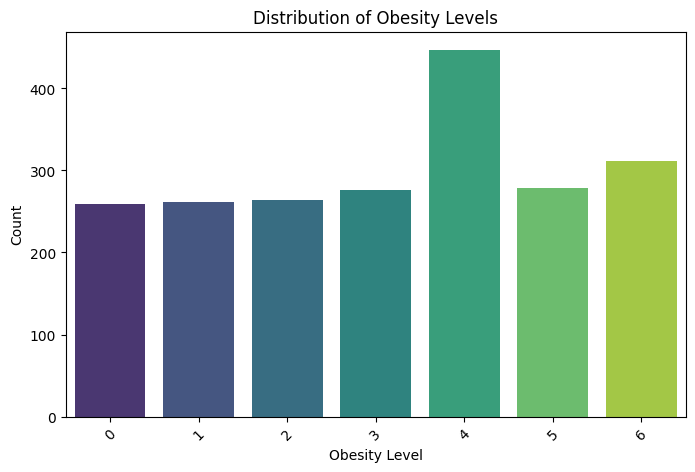

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=data['obesity'], palette='viridis')
plt.title("Distribution of Obesity Levels")
plt.xlabel("Obesity Level")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


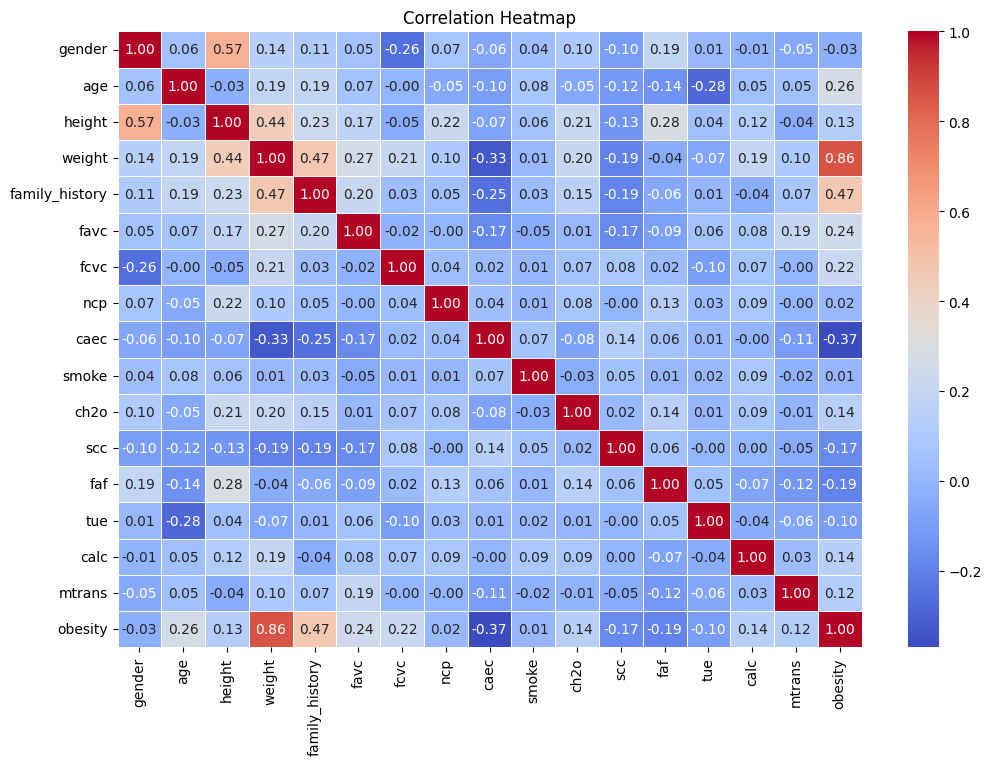

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


<ipython-input-78-15219c49d963>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="mtrans", y="obesity", data=data, palette="plasma", ci=None)
<ipython-input-78-15219c49d963>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="mtrans", y="obesity", data=data, palette="plasma", ci=None)


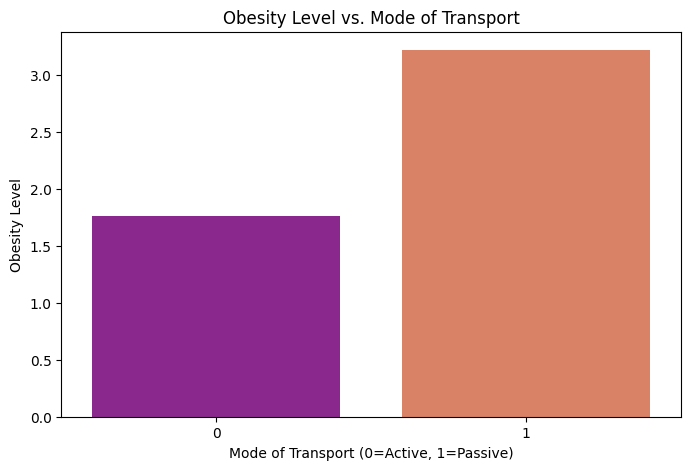

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x="mtrans", y="obesity", data=data, palette="plasma", ci=None)
plt.title("Obesity Level vs. Mode of Transport")
plt.xlabel("Mode of Transport (0=Active, 1=Passive)")
plt.ylabel("Obesity Level")
plt.show()


<ipython-input-79-07d51bb72a98>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='obesity', y='weight', data=data, palette='coolwarm')
<ipython-input-79-07d51bb72a98>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='obesity', y='height', data=data, palette='coolwarm')
<ipython-input-79-07d51bb72a98>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='obesity', y='age', data=data, palette='coolwarm')


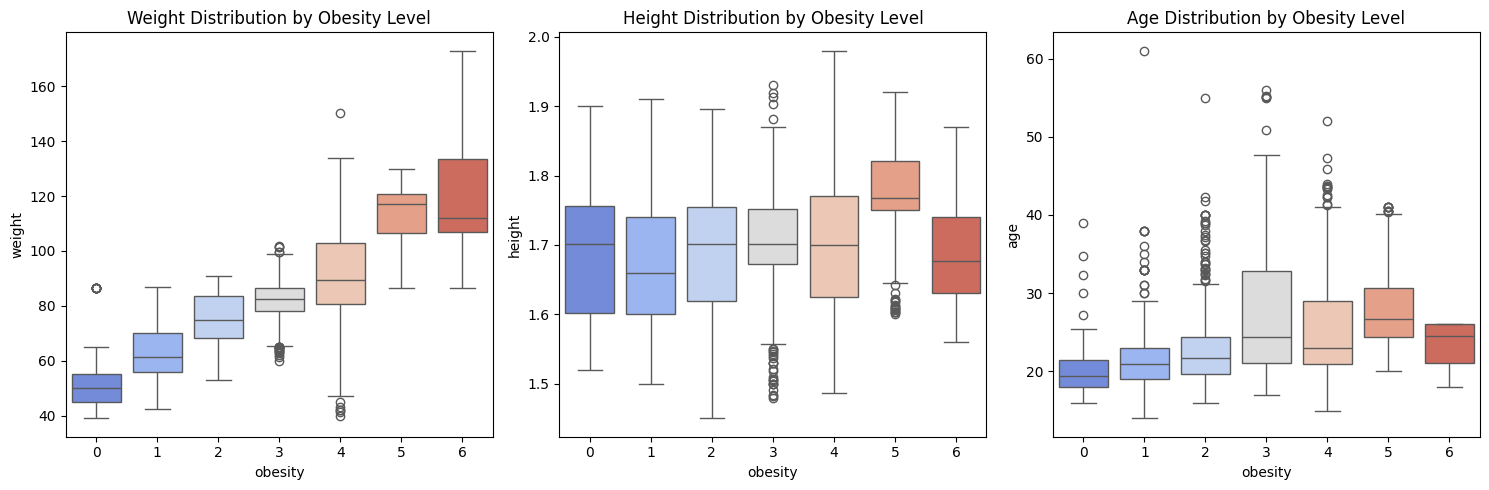

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(15, 5))

# Boxplot for Weight vs. Obesity
plt.subplot(1, 3, 1)
sns.boxplot(x='obesity', y='weight', data=data, palette='coolwarm')
plt.title('Weight Distribution by Obesity Level')

# Boxplot for Height vs. Obesity
plt.subplot(1, 3, 2)
sns.boxplot(x='obesity', y='height', data=data, palette='coolwarm')
plt.title('Height Distribution by Obesity Level')

# Boxplot for Age vs. Obesity
plt.subplot(1, 3, 3)
sns.boxplot(x='obesity', y='age', data=data, palette='coolwarm')
plt.title('Age Distribution by Obesity Level')

# Show plots
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Selecting relevant features based on correlation and domain knowledge
selected_features = ['age', 'weight', 'height', 'fcvc', 'ncp', 'faf', 'calc', 'mtrans']

# Extract features (X) and target variable (y)
X = data[selected_features].values
y = data['obesity'].values  # Target variable

# Normalize the features using Standardization (Z-score normalization)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Check Feature Importance using Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Get feature importance scores
feature_importance = model.feature_importances_

# Print feature importance in descending order
feature_importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importance:\n", feature_importance_df)

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Feature Importance:
   Feature  Importance
1  weight    0.371274
2  height    0.155620
0     age    0.141948
3    fcvc    0.122103
5     faf    0.087728
4     ncp    0.077507
6    calc    0.036660
7  mtrans    0.007160
Training samples: 1679
Testing samples: 420


In [ ]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize based on training set statistics
X_train_mean = X_train.mean(axis=0)
X_train_std = X_train.std(axis=0)

X_train = (X_train - X_train_mean) / X_train_std
X_test = (X_test - X_train_mean) / X_train_std  # Normalize test set using training mean & std

# Convert the target variable to binary classification (Obese vs. Not Obese)
y_train_binary = (y_train >= 3).astype(int)
y_test_binary = (y_test >= 3).astype(int)

# Define Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define binary cross-entropy loss
def compute_loss(y_true, y_pred):
    m = len(y_true)
    return - (1 / m) * np.sum(y_true * np.log(y_pred + 1e-8) + (1 - y_true) * np.log(1 - y_pred + 1e-8))

# Implement Logistic Regression
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.1, epochs=1000):  # Adjusted learning rate
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_features = X.shape[1]
        self.weights = np.zeros(n_features)
        self.bias = 0

        for epoch in range(self.epochs):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(linear_model)

            dw = (1 / len(y)) * np.dot(X.T, (y_pred - y))
            db = (1 / len(y)) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            if epoch % 100 == 0:
                loss = compute_loss(y, y_pred)
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_model)
        return (y_pred >= 0.5).astype(int)

# Train logistic regression model
log_reg = LogisticRegressionScratch(learning_rate=0.1, epochs=1000)  # Adjusted learning rate
log_reg.fit(X_train, y_train_binary)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Evaluate model
accuracy = np.mean(y_pred == y_test_binary)
print(f"Accuracy: {accuracy:.4f}")

# Additional evaluation metrics
print(classification_report(y_test_binary, y_pred))


Epoch 0: Loss = 0.6931
Epoch 100: Loss = 0.3424
Epoch 200: Loss = 0.3044
Epoch 300: Loss = 0.2884
Epoch 400: Loss = 0.2796
Epoch 500: Loss = 0.2740
Epoch 600: Loss = 0.2703
Epoch 700: Loss = 0.2677
Epoch 800: Loss = 0.2658
Epoch 900: Loss = 0.2644
Accuracy: 0.9000
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       157
           1       0.90      0.94      0.92       263

    accuracy                           0.90       420
   macro avg       0.90      0.89      0.89       420
weighted avg       0.90      0.90      0.90       420



Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86       157
           1       0.90      0.94      0.92       263

    accuracy                           0.90       420
   macro avg       0.90      0.89      0.89       420
weighted avg       0.90      0.90      0.90       420



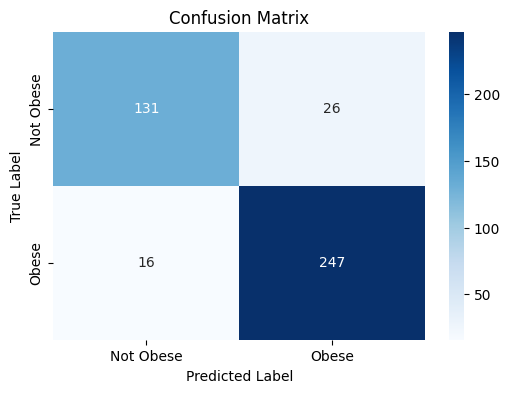

In [ ]:


# Classification Report
print("Classification Report:\n", classification_report(y_test_binary, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_binary, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Obese", "Obese"], yticklabels=["Not Obese", "Obese"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

# Standardize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
log_reg_sklearn = LogisticRegression(random_state=42)
log_reg_sklearn.fit(X_train_scaled, y_train_binary)

# Predict on test set
y_pred_sklearn = log_reg_sklearn.predict(X_test_scaled)

# Evaluate model
accuracy_sklearn = accuracy_score(y_test_binary, y_pred_sklearn)
print(f"Scikit-Learn Logistic Regression Accuracy: {accuracy_sklearn:.4f}")
print(classification_report(y_test_binary, y_pred_sklearn))


Scikit-Learn Logistic Regression Accuracy: 0.9190
              precision    recall  f1-score   support

           0       0.94      0.84      0.89       157
           1       0.91      0.97      0.94       263

    accuracy                           0.92       420
   macro avg       0.92      0.90      0.91       420
weighted avg       0.92      0.92      0.92       420



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=50, max_depth=5,
                                  min_samples_split=10, min_samples_leaf=10,
                                  max_features='sqrt', random_state=42)

# Train the model
rf_model.fit(X_train, y_train_binary)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate model
accuracy_rf = accuracy_score(y_test_binary, y_pred_rf)
print(f"Random Forest Classifier Accuracy: {accuracy_rf:.4f}")
print(classification_report(y_test_binary, y_pred_rf))


Random Forest Classifier Accuracy: 0.8881
              precision    recall  f1-score   support

           0       0.87      0.83      0.85       157
           1       0.90      0.92      0.91       263

    accuracy                           0.89       420
   macro avg       0.88      0.88      0.88       420
weighted avg       0.89      0.89      0.89       420



In [ ]:
# You can also compare precision and recall if needed.
if accuracy_sklearn > accuracy_rf:
    print("Logistic Regression performed better based on accuracy.")
else:
    print("Random Forest performed better based on accuracy.")

Logistic Regression performed better based on accuracy.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit & transform training data
X_test_scaled = scaler.transform(X_test)  # Transform test data using same scaler

# Step 2: Define Hyperparameter Grid
param_grid_logreg = {
    'C': [0.01, 0.1, 1, 10],  # Regularization strength
    'penalty': ['l1', 'l2'],  # L1 = Lasso, L2 = Ridge
    'solver': ['liblinear']  # Needed for L1 penalty
}

# Step 3: Initialize Model
log_reg = LogisticRegression(random_state=42)

# Step 4: Perform Grid Search with 5-fold Cross Validation
grid_search_logreg = GridSearchCV(log_reg, param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_logreg.fit(X_train_scaled, y_train_binary)

# Step 5: Print Best Hyperparameters
print(f"Best Logistic Regression Parameters: {grid_search_logreg.best_params_}")

# Step 6: Get Best Model and Evaluate on Test Set
best_logreg = grid_search_logreg.best_estimator_
y_pred_best_logreg = best_logreg.predict(X_test_scaled)

accuracy_best_logreg = accuracy_score(y_test_binary, y_pred_best_logreg)
print(f"Tuned Logistic Regression Accuracy: {accuracy_best_logreg:.4f}")
print(classification_report(y_test_binary, y_pred_best_logreg))


Best Logistic Regression Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Tuned Logistic Regression Accuracy: 0.9214
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       157
           1       0.91      0.97      0.94       263

    accuracy                           0.92       420
   macro avg       0.93      0.91      0.91       420
weighted avg       0.92      0.92      0.92       420



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

# Perform Random Search with 5-fold Cross Validation
random_search_rf = RandomizedSearchCV(rf, param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, n_iter=20, random_state=42)
random_search_rf.fit(X_train, y_train_binary)

# Print the best parameters
print(f"Best Random Forest Parameters: {random_search_rf.best_params_}")

# Get best model
best_rf = random_search_rf.best_estimator_

# Evaluate on test set
y_pred_best_rf = best_rf.predict(X_test)
accuracy_best_rf = accuracy_score(y_test_binary, y_pred_best_rf)
print(f"Tuned Random Forest Accuracy: {accuracy_best_rf:.4f}")
print(classification_report(y_test_binary, y_pred_best_rf))


Best Random Forest Parameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Tuned Random Forest Accuracy: 0.9405
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       157
           1       0.95      0.96      0.95       263

    accuracy                           0.94       420
   macro avg       0.94      0.93      0.94       420
weighted avg       0.94      0.94      0.94       420



In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Feature Selection for Logistic Regression
select_k_best_log_reg = SelectKBest(f_classif, k=5)  # Select top 5 features
X_train_selected_log_reg = select_k_best_log_reg.fit_transform(X_train, y_train_binary)  # Fit & transform on training set
X_test_selected_log_reg = select_k_best_log_reg.transform(X_test)  # Transform test set

# Print selected features
selected_features_log_reg = select_k_best_log_reg.get_support(indices=True)
print("Selected Features for Logistic Regression:", selected_features_log_reg)
print("Feature Scores:", select_k_best_log_reg.scores_)

# Train Logistic Regression
log_reg_selected = LogisticRegression()
log_reg_selected.fit(X_train_selected_log_reg, y_train_binary)  # Train with selected features

# Evaluate the model
y_pred_log_reg_selected = log_reg_selected.predict(X_test_selected_log_reg)
accuracy_log_reg_selected = accuracy_score(y_test_binary, y_pred_log_reg_selected)

print(f"Logistic Regression with selected features Accuracy: {accuracy_log_reg_selected:.4f}")


Selected Features for Logistic Regression: [0 1 2 5 7]
Feature Scores: [1.81701839e+02 1.63014654e+03 4.37852521e+01 1.35135408e+01
 2.97361244e+00 4.26091140e+01 6.81156175e-01 4.13320994e+01]
Logistic Regression with selected features Accuracy: 0.9048


Selected Feature Indices for Random Forest: [5 3 0 2 1]
Random Forest with selected features Accuracy: 0.8548
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        52
           1       0.85      0.85      0.85        52
           2       0.78      0.66      0.71        53
           3       0.74      0.84      0.79        55
           4       0.85      0.78      0.81        90
           5       0.86      0.96      0.91        56
           6       0.95      1.00      0.98        62

    accuracy                           0.85       420
   macro avg       0.85      0.86      0.85       420
weighted avg       0.85      0.85      0.85       420



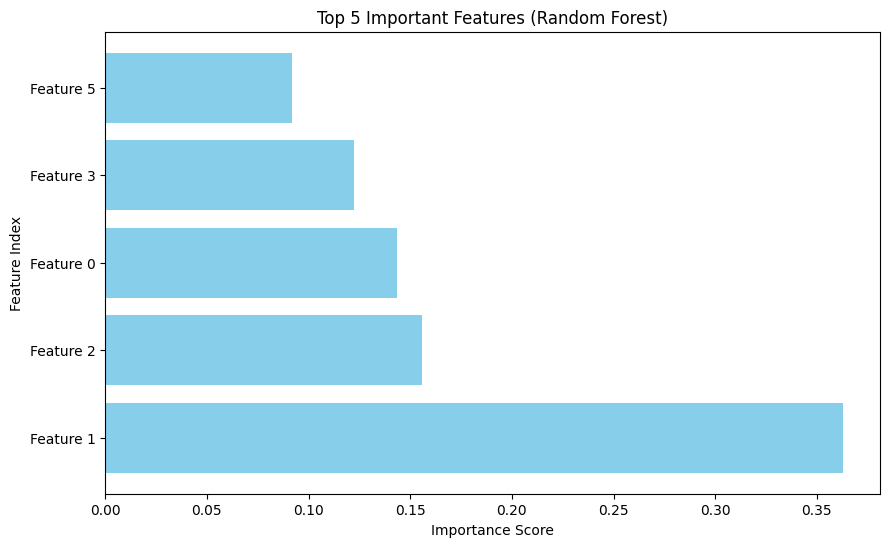

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score, classification_report

# Ensure X_train and X_test are NumPy arrays
X_train = X_train.to_numpy() if isinstance(X_train, pd.DataFrame) else X_train
X_test = X_test.to_numpy() if isinstance(X_test, pd.DataFrame) else X_test

# ✅ Step 1: Train a Random Forest Model to Get Feature Importances
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# ✅ Step 2: Get Feature Importances
importances = rf_model.feature_importances_

# ✅ Step 3: Select Top 5 Most Important Features
top_5_indices = np.argsort(importances)[-5:]  # Get indices of top 5 features

# ✅ Step 4: Select the Important Features
X_train_selected_rf = X_train[:, top_5_indices]
X_test_selected_rf = X_test[:, top_5_indices]

# ✅ Step 5: Print Feature Indices
print("Selected Feature Indices for Random Forest:", top_5_indices)

# ✅ Step 6: Train a New Random Forest Model on Selected Features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected_rf, y_train)

# ✅ Step 7: Evaluate Model Performance
y_pred_rf_selected = rf_selected.predict(X_test_selected_rf)
accuracy_rf_selected = accuracy_score(y_test, y_pred_rf_selected)

print(f"Random Forest with selected features Accuracy: {accuracy_rf_selected:.4f}")
print(classification_report(y_test, y_pred_rf_selected))

# ✅ Step 8: Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_5_indices)), importances[top_5_indices], color='skyblue')
plt.yticks(range(len(top_5_indices)), [f"Feature {i}" for i in top_5_indices])
plt.xlabel('Importance Score')
plt.ylabel('Feature Index')
plt.title('Top 5 Important Features (Random Forest)')
plt.gca().invert_yaxis()  # Reverse order for better visualization
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# ✅ Step 1: Use the best hyperparameters from GridSearchCV
best_params = grid_search_logreg.best_params_  # Extract best params from GridSearchCV

# ✅ Step 2: Train Logistic Regression with the best hyperparameters
log_reg_final = LogisticRegression(C=best_params['C'], solver=best_params['solver'], random_state=42)

# ✅ Step 3: Ensure SelectKBest was fitted before selecting features
selected_feature_indices = select_k_best_log_reg.get_support(indices=True)

# ✅ Step 4: Transform training & test data with selected features
X_train_selected_log_reg = X_train[:, selected_feature_indices]
X_test_selected_log_reg = X_test[:, selected_feature_indices]

# ✅ Step 5: Train the Logistic Regression model on the selected features
log_reg_final.fit(X_train_selected_log_reg, y_train_binary)

# ✅ Step 6: Evaluate the model
y_pred_log_reg_final = log_reg_final.predict(X_test_selected_log_reg)
accuracy_log_reg_final = accuracy_score(y_test_binary, y_pred_log_reg_final)

# ✅ Step 7: Print comparison with previous model
print(f"Logistic Regression with selected features Accuracy: {accuracy_log_reg_selected:.4f}")
print(f"Final Logistic Regression Accuracy (after tuning): {accuracy_log_reg_final:.4f}")

# ✅ Step 8: Print Classification Report
print("\nClassification Report:\n", classification_report(y_test_binary, y_pred_log_reg_final))

# ✅ Step 9: Compare Performance
if accuracy_log_reg_final > accuracy_log_reg_selected:
    print(" Model performance improved after hyperparameter tuning & feature selection.")
else:
    print(" Model performance did not improve. Try adjusting feature selection or using more features.")


Logistic Regression with selected features Accuracy: 0.9048
Final Logistic Regression Accuracy (after tuning): 0.9048

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.83      0.87       157
           1       0.91      0.95      0.93       263

    accuracy                           0.90       420
   macro avg       0.90      0.89      0.90       420
weighted avg       0.90      0.90      0.90       420

 Model performance did not improve. Try adjusting feature selection or using more features.
